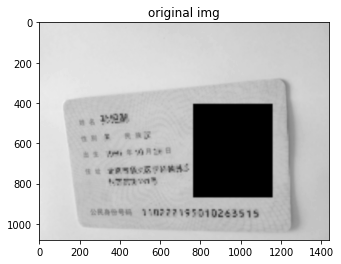

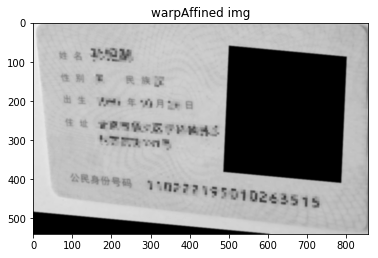

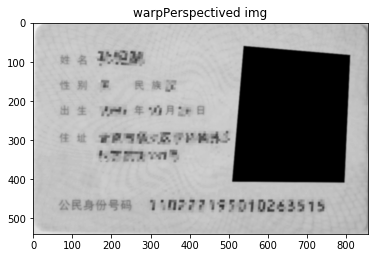

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from math import *
import re
%matplotlib inline


img_path = './2019714145258dama-redacted.png'
txt_path = './2763530_324.txt'


img = cv2.imread(img_path, 0)
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.title('original img')
plt.show()


# Roi顺时针坐标
with open(txt_path, 'r', encoding='utf-8') as f:
    rec = list(map(float, f.readline().strip().split(',')[:8]))
xDim, yDim = img.shape[1], img.shape[0]
pt1 = (rec[0], rec[1])
pt2 = (rec[2], rec[3])
pt3 = (rec[4], rec[5])
pt4 = (rec[6], rec[7])
pts = np.array([pt1, pt2, pt3, pt4], np.int32)
# 这里选择身份证的真实尺寸
H_rows, W_cols= 540, 856
# 原图中的四个角点(左上、右上、右下, 左下),与变换后矩阵位置
pts1 = np.float32([pt1, pt2, pt3])
pts2 = np.float32([[0, 0],[W_cols,0],[W_cols, H_rows]])

# 生成仿射变换矩阵；进行仿射变换
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, dsize=(W_cols,H_rows))
plt.imshow(dst, cmap='gray', interpolation='bicubic')
plt.title('warpAffined img')
plt.show()


pts1 = np.float32([pt1, pt2, pt3, pt4])
pts2 = np.float32([[0, 0],[W_cols,0],[W_cols, H_rows],[0, H_rows],])
# 生成透视变换矩阵；进行透视变换
M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, dsize=(W_cols,H_rows))
plt.imshow(dst, cmap='gray', interpolation='bicubic')
plt.title('warpPerspectived img')
plt.show()



